<a href="https://colab.research.google.com/github/hoaint25/IBM_Data_Analyst/blob/master/Dash_Interactivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

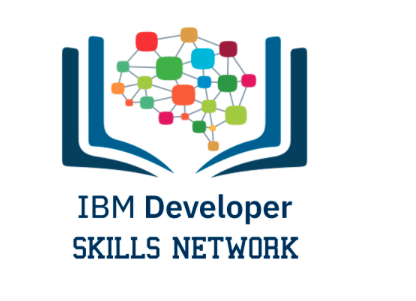
## **Objectives**

In this lab, you will work on Dash Callbacks.

## **Dataset Used**

Airline Reporting Carrier On-Time Performance dataset from Data Asset eXchange

## **Lab Question**

Extract average monthly arrival delay time and see how it changes over the year.

# **Dash Application Creation**

### **Todo for the lab question**
1. Import required libraries, read the airline data, and create an application layout
2. Add title to the dashboard using HTML H1 component
3. Add a HTML division and core text input component inside the division. Provide an input component id and a default value to the component.
4. Add a HTML dividion and core graph component. Provide a graph component id.
5. Add callback decorator and provide input and output parameters.
6. Define callback function, perform computation to extract required information, create the graph, and update the layout.
7. Run the app

## **Hints**
General examples can be found here.

1. For step 1 (only review), this is very specific to running app from Jupyerlab.

- For Jupyterlab,we will be using jupyter-dash library. Adding from jupyter_dash import JupyterDash import statement.
- Instead of creating dash application using app = dash.Dash(), we will be using app = JupyterDash(__name__).
- Use pandas to read the airline data.
2. For step 2,

- Plotly H1 HTML Component
- Title as Airline Performance Dashboard
- Use style parameter and make the title center aligned, with color code #503D36, and font-size as 40. Check More about HTML section here.

3. For step 3,

- Add dcc input component and provide id as input-year. Use style parameter and assign height of the inout box to be 50px and font-size to be 35.
- HTML Div component and provide id as line-plot. Use style parameter and assign font-size as 40.
4. For step 4,

- Core graph component and assign id as line-plot.
5. For 5 and 6,

- Basic callback

# **App Skeleton**

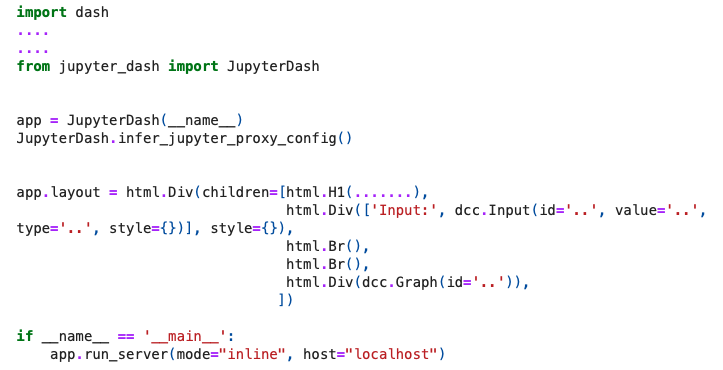

In [2]:
pip install dash


     |████████████████████████████████| 9.6 MB 5.4 MB/s 
     |████████████████████████████████| 357 kB 52.9 MB/s 


In [3]:
pip install dash_html_components

In [4]:
pip install jupyter_dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=7afa0ac370e9a908b38cbe0c7b3f7de874c3d3a1ea825fa0e3158ff006e3f752
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [13]:
#import required library 
import pandas as pd
import plotly.express as px
import dash
import dash_html_components as html 
import dash_core_components as dcc
from dash.dependencies import Output, Input
from dash import Dash
import socket

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#read the airline data into pandas dataframe 
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [8]:

airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,N785AS,584,11884,1188401,31884,GEG,"Spokane, WA",WA,53.0,Washington,93,14747,1474702,30559,SEA,"Seattle, WA",WA,53.0,Washington,93,1330,1330.0,0.0,0.0,0.0,0.0,1300-1359,8.0,1338.0,1415.0,5.0,1426,1420.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,56.0,50.0,37.0,1.0,224.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,N24103,4132,11618,1161802,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,14524,1452401,34524,RIC,"Richmond, VA",VA,51.0,Virginia,38,1301,1255.0,-6.0,0.0,0.0,-1.0,1300-1359,9.0,1304.0,1358.0,13.0,1423,1411.0,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,82.0,76.0,54.0,1.0,277.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,NaN,2206,14108,1410801,34108,PIA,"Peoria, IL",IL,17.0,Illinois,41,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,1650,1723.0,33.0,33.0,1.0,2.0,1600-1659,NaN,NaN,NaN,NaN,1730,1815.0,45.0,45.0,1.0,3.0,1700-1759,0.0,NaN,0.0,40.0,52.0,NaN,1.0,130.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,NaN,1207,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,14107,1410701,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,1245,1309.0,24.0,24.0,1.0,1.0,1200-1259,NaN,NaN,NaN,NaN,1457,1538.0,41.0,41.0,1.0,2.0,1400-1459,0.0,NaN,0.0,72.0,89.0,NaN,1.0,370.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,N827UA,576,11003,1100303,31003,CID,"Cedar Rapids/Iowa City, IA",IA,19.0,Iowa,61,11292,1129202,30325,DEN,"Denver, CO",CO,8.0,Colorado,82,755,746.0,-9.0,0.0,0.0,-1.0,0700-0759,8.0,754.0,836.0,8.0,902,844.0,-18.0,0.0,0.0,-2.0,0900-0959,0.0,NaN,0.0,127.0,118.0,102.0,1.0,692.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
app = dash.Dash()

In [10]:
#get the layout of the application and adjust it
app.layout = html.Div(children=[html.H1('AirLine Performace Dashboard',
                                style = {'textAligned':'center',
                                          'color':'#503D36'}),
                                html.Div(['Input:', dcc.Input(id='input-year', value='2010', type='number', style={'font-size':'35',
                                                                                                             'height':'50px'})], style={'font-size':'40'}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='line-plot')),
                               ])

In [11]:
@app.callback(Output(component_id='line-plot', component_property='figure'),
             Input(component_id='input-year', component_property='value'))

def get_graph(entered_year):
  #select data
  df = airline_data[airline_data['Year'] == int(entered_year)]
  #top 10 airline carrier in the terms of number fights 
  g1 = df.groupby(['Month'])['ArrDelay'].mean()
  #plot the largest
  fig1 = px.bar(g1, x ='Average Minutes', y = 'Flights', title = 'Average month arrival delay time in year '+str(entered_year))
  fig1.update_layout()
  return fig1


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)